In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading datasets

In [2]:
train_df = pd.read_json('train_df_stage_1.json')
test_df = pd.read_json('test_df_stage_1.json')

In [3]:
train_df.head()

,ID,profile,tweet,neighbor,domain,label,nn_signal,lang_count,tweet_min_len,tweet_max_len,...,days_old,listed_count,statuses_count,description_len,sentiment,similarity,num_mentions,num_links,retweet,num_tweets
0,817215304443064320,"{'id': '817215304443064320 ', 'id_str': '81721...",[@realDonaldTrump Why isn't Candice speaking a...,"{'following': ['39349894', '109377444226470707...",[Business],1,0.727475,1,24,72,...,1940,0,7,1,Negative,0.377669,0.857143,0.142857,0.000000,7
1,309366491,"{'id': '309366491 ', 'id_str': '309366491 ', '...",[RT @EvilGeniuses: The fight starts tonight! J...,"{'following': ['2204319241', '91043334', '2797...","[Politics, Business, Entertainment, Sports]",0,0.348384,1,24,302,...,3985,7165,19851,147,Positive,0.641426,1.070000,0.885000,0.220000,200
2,844716665866780672,"{'id': '844716665866780673 ', 'id_str': '84471...","[RT @Jillibean557: What the actual fuck, is “s...","{'following': ['130690429', '980727758', '8072...",[Sports],1,0.960838,1,20,228,...,1864,18,364875,22,Negative,0.663961,1.295000,0.190000,0.890000,200
3,1278128076187148288,"{'id': '1278128076187148294 ', 'id_str': '1278...",[RT @gmgbrazy: I will NEVER be pressed bout no...,"{'following': ['1142587031345868800', '1214573...",[Entertainment],0,0.620600,4,10,248,...,668,0,613,138,Negative,0.467302,0.816327,0.147959,0.260204,196
4,932011897,"{'id': '932011897 ', 'id_str': '932011897 ', '...",[@javierpadillab Espero que tenga cebolla...\n...,"{'following': ['721273439051517952', '29622015...",[Business],0,0.161057,3,17,313,...,3461,21,5201,159,Negative,0.681156,1.075000,0.300000,0.230000,200


In [4]:
test_df.head()

,ID,profile,tweet,neighbor,domain,label,nn_signal,lang_count,tweet_min_len,tweet_max_len,...,days_old,listed_count,statuses_count,description_len,sentiment,similarity,num_mentions,num_links,retweet,num_tweets
0,27941766,"{'id': '27941766 ', 'id_str': '27941766 ', 'na...",[(should add that all of this makes Facebook u...,"{'following': ['14145296', '14363197', '598407...",[Entertainment],0,0.793397,1,76,271,...,4778,1064,44,68,Positive,0.757497,0.166667,0.166667,0.166667,6
1,1125171431740932096,"{'id': '1125171431740932096 ', 'id_str': '1125...",[Greatness is what happens when you relentless...,"{'following': ['1285200799686107136', '1187461...",[Sports],1,0.871033,3,18,301,...,1091,17,11953,154,Positive,0.774367,0.875000,0.110000,0.030000,200
2,1012042227844075520,"{'id': '1012042227844075522 ', 'id_str': '1012...",[@Jennife81869440 @rak_strong @MichaelaCharl10...,"{'following': ['1180909869815214090', '4012573...",[Sports],1,0.868369,1,12,304,...,1403,0,4545,156,Positive,0.668960,1.640000,0.095000,0.595000,200
3,312790033,"{'id': '312790033 ', 'id_str': '312790033 ', '...",[Does anyone know of any land in Cornwall to s...,"{'following': ['4286886339', '2231858782', '24...",[Business],1,0.760693,3,24,165,...,3980,172,1573,135,Positive,0.637985,0.655000,1.390000,0.200000,200
4,425671349,"{'id': '425671349 ', 'id_str': '425671349 ', '...",[@aa_mm7777 تويي اشوف كلامها الي تحت 😫 لا صادق...,"{'following': ['304486361', '301500426', '1481...",[Sports],0,0.634907,4,5,159,...,3803,121,60836,1,Positive,0.035770,1.045226,0.080402,0.120603,199


Training  dataset EDA

    1- General info about dataset
    2- Distribution for each features
    3- Correlation between features (Bivariate & Multivariate)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9395 entries, 0 to 9394
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                9395 non-null   int64  
 1   profile           9395 non-null   object 
 2   tweet             9395 non-null   object 
 3   neighbor          8511 non-null   object 
 4   domain            9395 non-null   object 
 5   label             9395 non-null   int64  
 6   nn_signal         9395 non-null   float64
 7   lang_count        9395 non-null   int64  
 8   tweet_min_len     9395 non-null   int64  
 9   tweet_max_len     9395 non-null   int64  
 10  tweet_av_len      9395 non-null   float64
 11  tweet_len_std     9395 non-null   float64
 12  user_name_len     9395 non-null   int64  
 13  screen_name_len   9395 non-null   int64  
 14  user_name_chars   9395 non-null   int64  
 15  protected         9395 non-null   int64  
 16  verified          9395 non-null   int64  


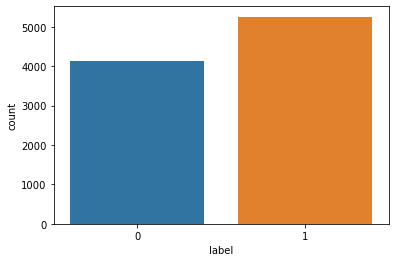

In [6]:
sns.countplot(train_df['label']);

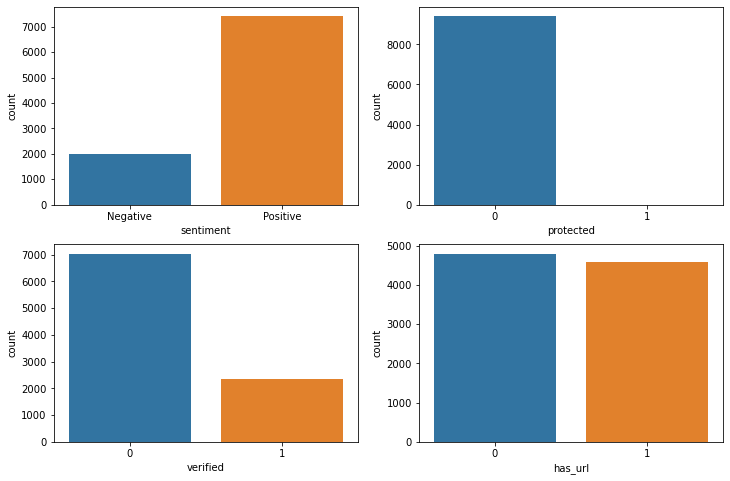

In [7]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.countplot(train_df['sentiment'], ax=axes[0][0]);
sns.countplot(train_df['protected'], ax= axes[0][1]);
sns.countplot(train_df['verified'], ax= axes[1][0]);
sns.countplot(train_df['has_url'], ax= axes[1][1]);

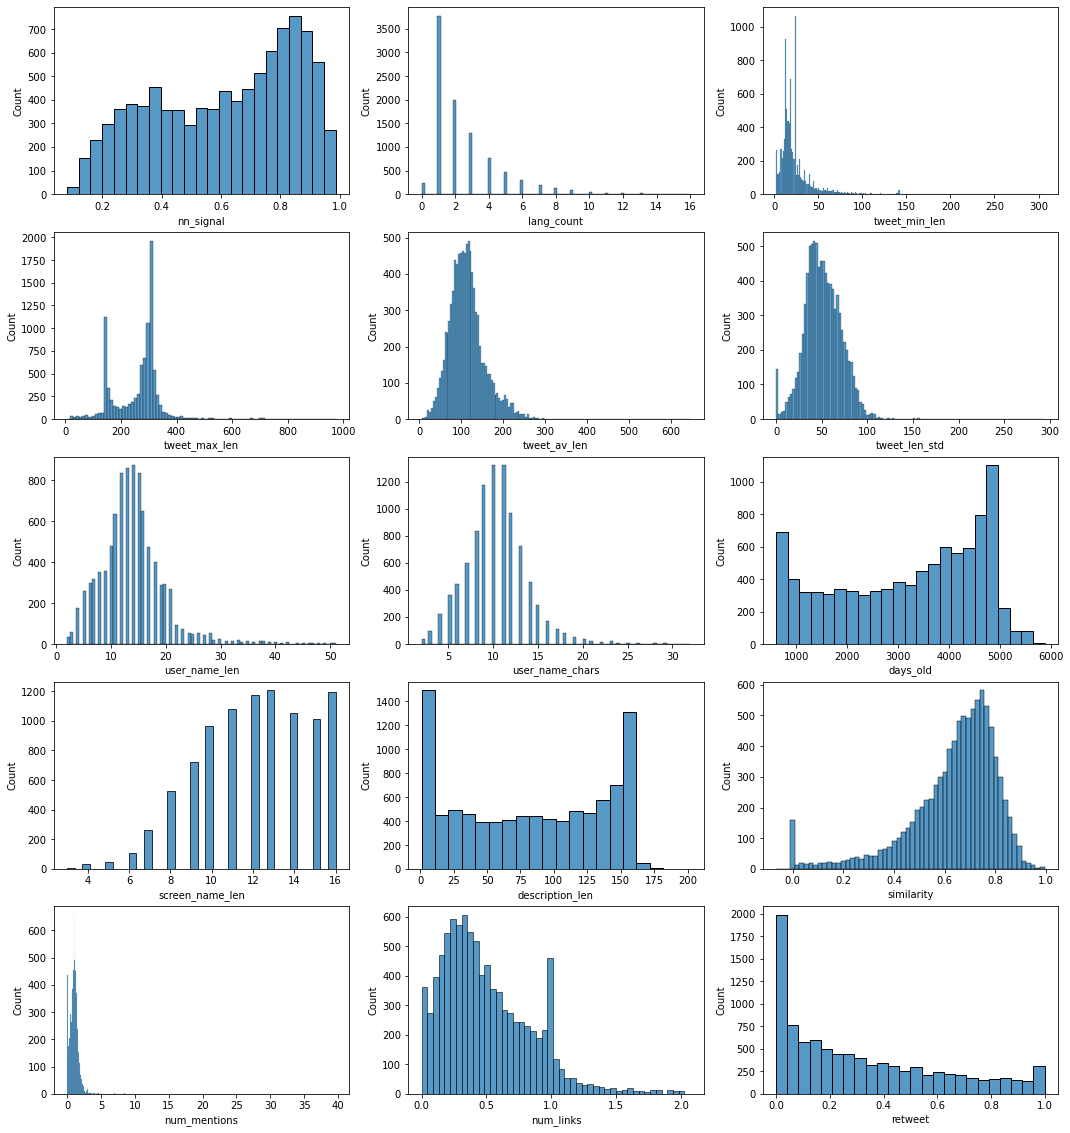

In [8]:
f, axes = plt.subplots(5, 3, figsize=(18,20))

sns.histplot(train_df['nn_signal'], ax=axes[0][0]);
sns.histplot(train_df['lang_count'], ax= axes[0][1]);
sns.histplot(train_df['tweet_min_len'], ax= axes[0][2]);
sns.histplot(train_df['tweet_max_len'], ax= axes[1][0]);
sns.histplot(train_df['tweet_av_len'], ax= axes[1][1]);
sns.histplot(train_df['tweet_len_std'], ax= axes[1][2]);
sns.histplot(train_df['user_name_len'], ax= axes[2][0]);
sns.histplot(train_df['user_name_chars'], ax= axes[2][1]);
sns.histplot(train_df['days_old'], ax= axes[2][2]);
sns.histplot(train_df['screen_name_len'], ax= axes[3][0]);
sns.histplot(train_df['description_len'], ax= axes[3][1]);
sns.histplot(train_df['similarity'], ax= axes[3][2]);
sns.histplot(train_df['num_mentions'], ax= axes[4][0]);
sns.histplot(train_df['num_links'], ax= axes[4][1]);
sns.histplot(train_df['retweet'], ax= axes[4][2]);

In [9]:
print("The shortest tweet has a length of ",train_df['tweet_min_len'].min())

The shortest tweet has a length of  2


In [10]:
print("The longest tweet has a length of",train_df['tweet_max_len'].max())

The longest tweet has a length of 973


In [11]:
train_df[['followers_count','friends_count','favourites_count','listed_count','statuses_count','num_tweets']].describe()

,followers_count,friends_count,favourites_count,listed_count,statuses_count,num_tweets
count,9.395000e+03,9.395000e+03,9395.000000,9395.000000,9.395000e+03,9395.000000
mean,6.869087e+05,6.077159e+03,13440.151676,1582.677914,2.169241e+04,169.989675
std,4.416796e+06,4.405045e+04,38888.962339,9783.716997,7.188291e+04,62.562907
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000
25%,2.140000e+02,2.390000e+02,162.000000,0.000000,4.240000e+02,194.000000
50%,2.011000e+03,7.260000e+02,1679.000000,13.000000,3.653000e+03,200.000000
75%,3.797100e+04,2.119500e+03,9598.000000,268.500000,1.630000e+04,200.000000
max,1.218263e+08,1.466881e+06,783456.000000,550181.000000,2.996916e+06,201.000000


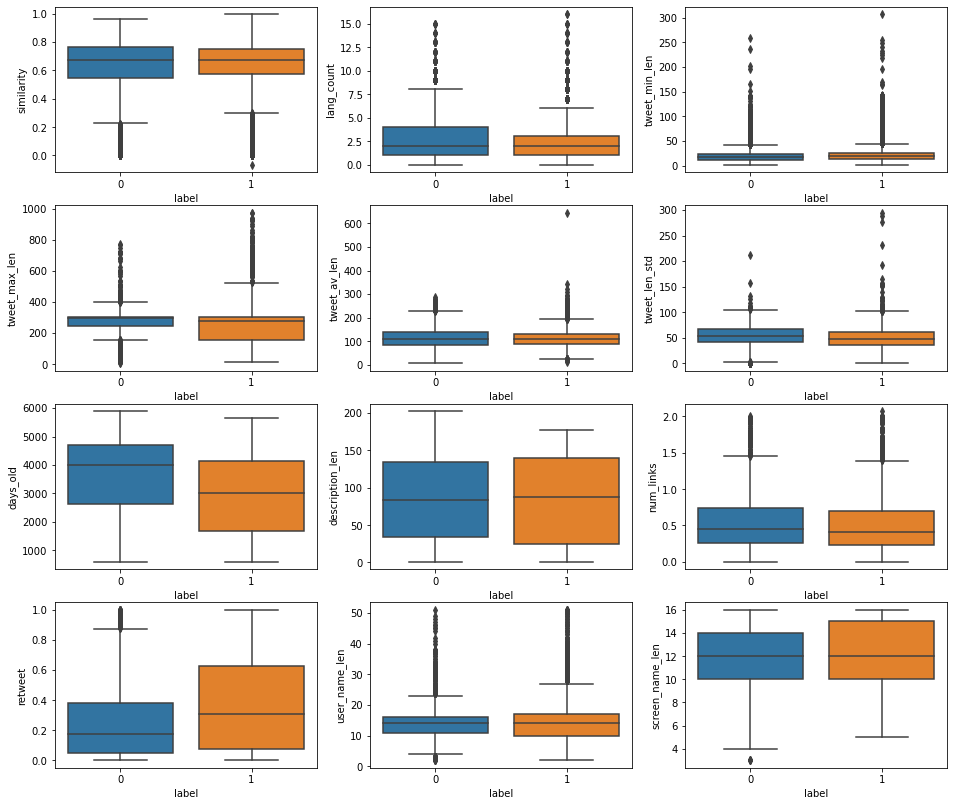

In [12]:
f, axes = plt.subplots(4, 3, figsize=(16,14))

sns.boxplot(x=train_df['label'], y=train_df['similarity'], ax=axes[0][0]);
sns.boxplot(x=train_df['label'], y=train_df['lang_count'], ax= axes[0][1]);
sns.boxplot(x=train_df['label'], y=train_df['tweet_min_len'], ax= axes[0][2]);
sns.boxplot(x=train_df['label'], y=train_df['tweet_max_len'], ax= axes[1][0]);
sns.boxplot(x=train_df['label'], y=train_df['tweet_av_len'], ax= axes[1][1]);
sns.boxplot(x=train_df['label'], y=train_df['tweet_len_std'], ax= axes[1][2]);
sns.boxplot(x=train_df['label'], y=train_df['days_old'], ax= axes[2][0]);
sns.boxplot(x=train_df['label'], y=train_df['description_len'], ax= axes[2][1]);
sns.boxplot(x=train_df['label'], y=train_df['num_links'], ax= axes[2][2]);
sns.boxplot(x=train_df['label'], y=train_df['retweet'], ax= axes[3][0]);
sns.boxplot(x=train_df['label'], y=train_df['user_name_len'], ax= axes[3][1]);
sns.boxplot(x=train_df['label'], y=train_df['screen_name_len'], ax= axes[3][2]);

Testing data EDA

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1175
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1176 non-null   int64  
 1   profile           1176 non-null   object 
 2   tweet             1176 non-null   object 
 3   neighbor          1070 non-null   object 
 4   domain            1176 non-null   object 
 5   label             1176 non-null   int64  
 6   nn_signal         1176 non-null   float64
 7   lang_count        1176 non-null   int64  
 8   tweet_min_len     1176 non-null   int64  
 9   tweet_max_len     1176 non-null   int64  
 10  tweet_av_len      1176 non-null   float64
 11  tweet_len_std     1176 non-null   float64
 12  user_name_len     1176 non-null   int64  
 13  screen_name_len   1176 non-null   int64  
 14  user_name_chars   1176 non-null   int64  
 15  protected         1176 non-null   int64  
 16  verified          1176 non-null   int64  


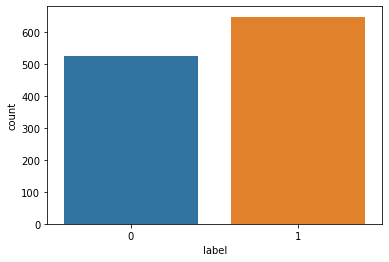

In [14]:
sns.countplot(test_df['label']);

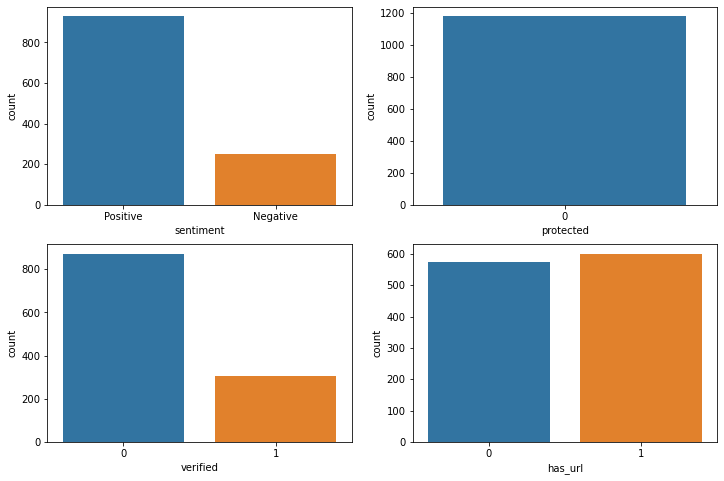

In [15]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.countplot(test_df['sentiment'], ax=axes[0][0]);
sns.countplot(test_df['protected'], ax= axes[0][1]);
sns.countplot(test_df['verified'], ax= axes[1][0]);
sns.countplot(test_df['has_url'], ax= axes[1][1]);

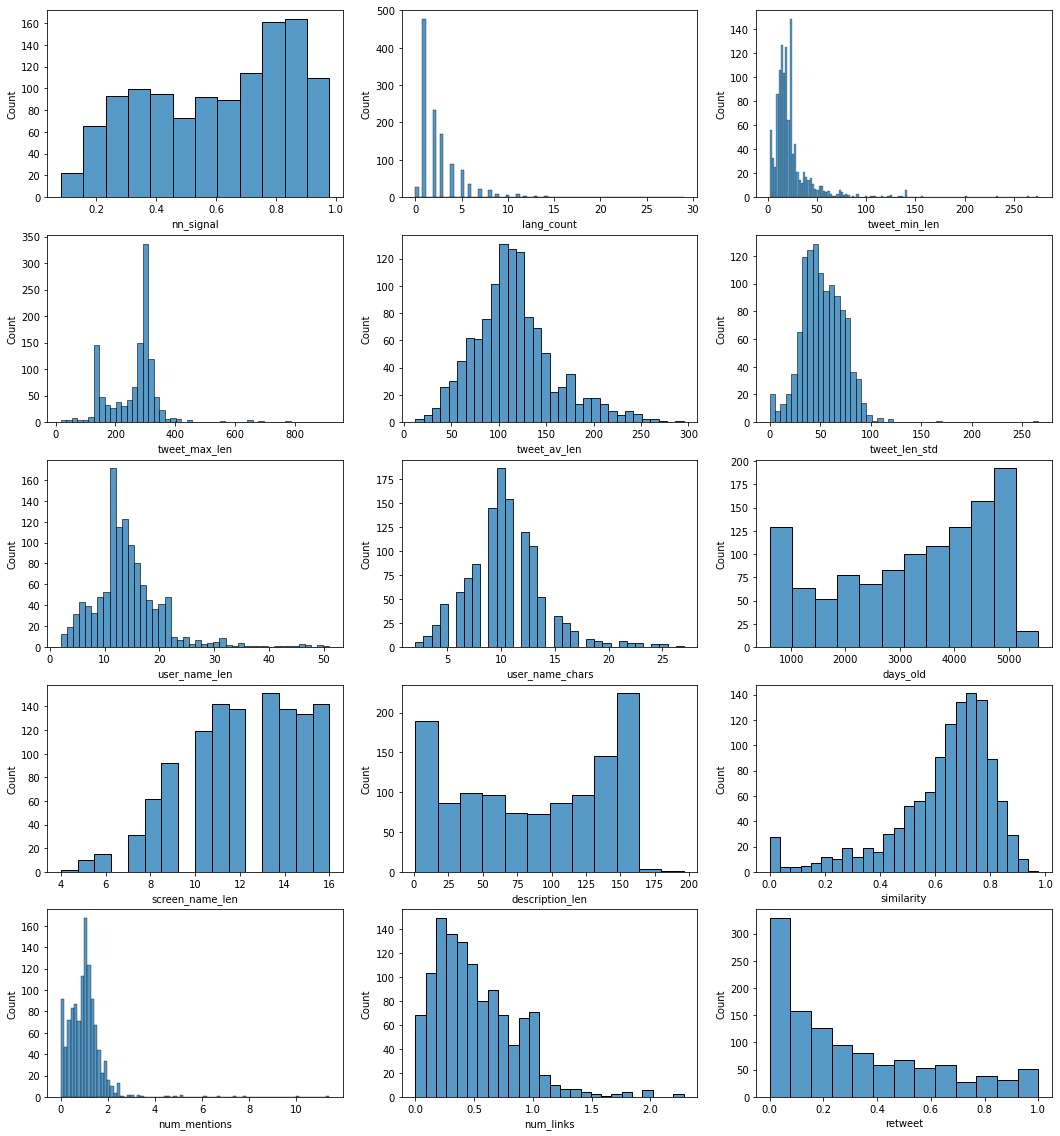

In [16]:
f, axes = plt.subplots(5, 3, figsize=(18,20))

sns.histplot(test_df['nn_signal'], ax=axes[0][0]);
sns.histplot(test_df['lang_count'], ax= axes[0][1]);
sns.histplot(test_df['tweet_min_len'], ax= axes[0][2]);
sns.histplot(test_df['tweet_max_len'], ax= axes[1][0]);
sns.histplot(test_df['tweet_av_len'], ax= axes[1][1]);
sns.histplot(test_df['tweet_len_std'], ax= axes[1][2]);
sns.histplot(test_df['user_name_len'], ax= axes[2][0]);
sns.histplot(test_df['user_name_chars'], ax= axes[2][1]);
sns.histplot(test_df['days_old'], ax= axes[2][2]);
sns.histplot(test_df['screen_name_len'], ax= axes[3][0]);
sns.histplot(test_df['description_len'], ax= axes[3][1]);
sns.histplot(test_df['similarity'], ax= axes[3][2]);
sns.histplot(test_df['num_mentions'], ax= axes[4][0]);
sns.histplot(test_df['num_links'], ax= axes[4][1]);
sns.histplot(test_df['retweet'], ax= axes[4][2]);

In [17]:
print("The shortest tweet has a length of ",test_df['tweet_min_len'].min())

The shortest tweet has a length of  2


In [18]:
print("The longest tweet has a length of",test_df['tweet_max_len'].max())

The longest tweet has a length of 916


In [19]:
test_df[['followers_count','friends_count','favourites_count','listed_count','statuses_count','num_tweets']].describe()

,followers_count,friends_count,favourites_count,listed_count,statuses_count,num_tweets
count,1.176000e+03,1.176000e+03,1176.000000,1176.000000,1176.000000,1176.000000
mean,7.855283e+05,9.913931e+03,11805.086735,1724.414116,19937.516156,170.663265
std,4.618967e+06,1.340214e+05,32380.285549,10421.988427,49628.366971,62.069684
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,2.155000e+02,2.427500e+02,160.750000,1.000000,474.250000,194.000000
50%,2.278500e+03,8.040000e+02,1534.000000,17.000000,3880.500000,200.000000
75%,4.601800e+04,2.229750e+03,8105.250000,297.750000,15997.250000,200.000000
max,8.182332e+07,4.339982e+06,442105.000000,207749.000000,698270.000000,200.000000


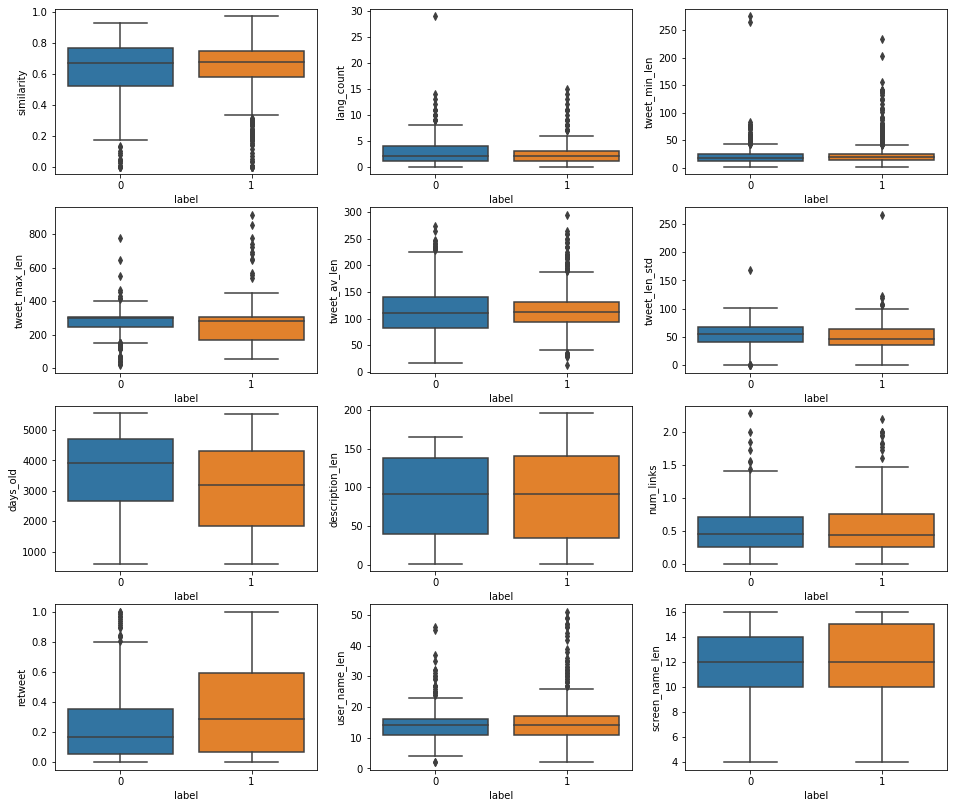

In [20]:
f, axes = plt.subplots(4, 3, figsize=(16,14))

sns.boxplot(x=test_df['label'], y=test_df['similarity'], ax=axes[0][0]);
sns.boxplot(x=test_df['label'], y=test_df['lang_count'], ax= axes[0][1]);
sns.boxplot(x=test_df['label'], y=test_df['tweet_min_len'], ax= axes[0][2]);
sns.boxplot(x=test_df['label'], y=test_df['tweet_max_len'], ax= axes[1][0]);
sns.boxplot(x=test_df['label'], y=test_df['tweet_av_len'], ax= axes[1][1]);
sns.boxplot(x=test_df['label'], y=test_df['tweet_len_std'], ax= axes[1][2]);
sns.boxplot(x=test_df['label'], y=test_df['days_old'], ax= axes[2][0]);
sns.boxplot(x=test_df['label'], y=test_df['description_len'], ax= axes[2][1]);
sns.boxplot(x=test_df['label'], y=test_df['num_links'], ax= axes[2][2]);
sns.boxplot(x=test_df['label'], y=test_df['retweet'], ax= axes[3][0]);
sns.boxplot(x=test_df['label'], y=test_df['user_name_len'], ax= axes[3][1]);
sns.boxplot(x=test_df['label'], y=test_df['screen_name_len'], ax= axes[3][2]);